In [3]:
import pandas as pd
import networkx as nx
import random

In [4]:
transition_structure = {
    (1,1): 4,
    (1,2): 3,
    (1,3): 2,
    (1,4): 1,
    (1,5): 5,
    (2,1): 5,
    (2,2): 4,
    (2,3): 3,
    (2,4): 2,
    (2,5): 1,
    (3,1): 3,
    (3,2): 2,
    (3,3): 1,
    (3,4): 5,
    (3,5): 4,
    (4,1): 1,
    (4,2): 5,
    (4,3): 4,
    (4,4): 3,
    (4,5): 2, 
    (5,1): 2,
    (5,2): 1,
    (5,3): 5,
    (5,4): 4,
    (5,5): 3
}

def get_sequence():
    start = [random.randint(1,5),random.randint(1,5)]
    for i in range(50):
        num = random.uniform(0, 1)
        if num > 0.1:
            next_val = transition_structure[tuple(start[-2:])]
        else:
            if 0 < num < 0.02:
                next_val = 1
            if 0.02 < num < 0.04:
                next_val = 2
            if 0.04 < num < 0.06:
                next_val = 3
            if 0.06 < num < 0.08:
                next_val = 4
            if 0.08 < num < 0.1:
                next_val = 5
        start.append(next_val)
    return ','.join([str(i) for i in start])

seqs = [get_sequence() for i in range(5000)]
seqs[0:3]

['5,4,4,3,4,5,2,1,5,5,3,5,4,4,1,1,4,2,5,1,2,3,3,1,3,2,2,4,1,1,4,1,1,2,3,3,1,3,2,2,4,2,5,1,2,5,1,2,3,3,1,3',
 '4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,4,2,5,1,2,3,3,1,5,5,3,5,4,4',
 '2,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,1,5,5,3,3,1,3,5,4,4,3,4,5,2,1,5,5,3,3,5,4,4,3,4,5,2,1,5']

In [9]:
import logging
from random import shuffle

from simpletransformers.language_modeling import (
    LanguageModelingModel,
    LanguageModelingArgs,
)


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

model_args = LanguageModelingArgs()
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.num_train_epochs = 10
model_args.dataset_type = "simple"
model_args.save_model_every_epoch = False
model_args.evaluate_during_training = True
model_args.mlm = False  # mlm must be False for CLM
model_args.learning_rate = 1e-6
model_args.vocab_size=100
model_args.use_early_stopping = True
model_args.evaluate_during_training_steps = 500

text_file = open("train.txt", "w")
walks = [get_sequence() for i in range(5000)]
shuffle(walks)
n = text_file.write('\n'.join(walks))
text_file.close()

text_file = open("test.txt", "w")
walks = [get_sequence() for i in range(1000)]
shuffle(walks)
n = text_file.write('\n'.join(walks))
text_file.close()

train_file = "train.txt"
test_file = "temp_test.txt"

model = LanguageModelingModel(
    "gpt2", None, train_files='train.txt', args=model_args
)

# Train the model
model.train_model(train_file, eval_file=test_file)

# Evaluate the model
result = model.eval_model(test_file)

INFO:simpletransformers.language_modeling.language_modeling_model: Training of None tokenizer complete. Saved to outputs/.
file outputs/config.json not found
INFO:simpletransformers.language_modeling.language_modeling_model: Training language model from scratch
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/4087 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_train.txt
INFO:simpletransformers.language_modeling.language_modeling_model: Training started


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/511 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt
INFO:simpletransformers.language_modeling.language_modeling_model: No improvement in eval_loss
INFO:simpletransformers.language_modeling.language_modeling_model: Current step: 1
INFO:simpletransformers.language_modeling.language_modeling_model: Early stopping patience: 3
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt


Running Epoch 1 of 10:   0%|          | 0/511 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt


Running Epoch 2 of 10:   0%|          | 0/511 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt


Running Epoch 3 of 10:   0%|          | 0/511 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt


Running Epoch 4 of 10:   0%|          | 0/511 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt


Running Epoch 5 of 10:   0%|          | 0/511 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt


Running Epoch 6 of 10:   0%|          | 0/511 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt


Running Epoch 7 of 10:   0%|          | 0/511 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
def get_random_sequence():
    start = [random.randint(1,5),random.randint(1,5)]
    for i in range(50):
        next_val = random.randint(1,5)
        start.append(next_val)
    return ','.join([str(i) for i in start])


text_file = open("temp_test.txt", "w")
walks = [get_random_sequence() for i in range(1000)]
shuffle(walks)
n = text_file.write('\n'.join(walks))
text_file.close()

model.eval_model("temp_test.txt")

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_temp_test.txt


Running Evaluation:   0%|          | 0/103 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.9590136113676052, 'perplexity': tensor(2.6091)}


{'eval_loss': 0.9590136113676052, 'perplexity': tensor(2.6091)}

In [10]:
model.eval_model("test.txt")

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_test.txt


Running Evaluation:   0%|          | 0/103 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.7959917245559323, 'perplexity': tensor(2.2166)}


{'eval_loss': 0.7959917245559323, 'perplexity': tensor(2.2166)}

<Figure size 432x288 with 0 Axes>

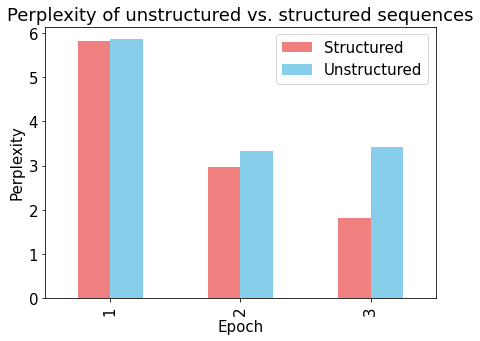

In [53]:
from matplotlib import pyplot as plt

plt.figure()
plt.rcParams.update({'font.size' : 15})

epochs = [1,2,3]
perplexity_structured = [5.81, 2.97, 1.81]
perplexity_unstructured = [5.85, 3.32, 3.42]
groups = [[5.81, 2.97, 2.21], [5.85, 3.32, 3.42]]

df = pd.DataFrame({'Structured': perplexity_structured, 'Unstructured': perplexity_unstructured}, index=epochs)
plot = df.plot.bar(title='Perplexity of unstructured vs. structured sequences', 
            color={'Structured': 'lightcoral', 'Unstructured': 'skyblue'},
           xlabel='Epoch', figsize=(7,5), ylabel='Perplexity')

plt.savefig('durrant_data.png')


In [ ]:
before training:
    

    
after 1 epoch:
perplexity = 5.9
perplexity = 5.8

after 2 epochs:
perplexity = 2.21
perplexity = 


In [ ]:
from simpletransformers.language_generation import LanguageGenerationModel, LanguageGenerationArgs

model = LanguageGenerationModel("gpt2", "outputs", args={'do_sample': False})
#model = LanguageGenerationModel("gpt2", "outputs", args={'num_beams': 100, 'num_return_sequences': 5, 'do_sample': True})


In [ ]:
model.generate("1,1")

In [ ]:
prompts = ["c E f W", "u N h S", "v W o E", "j S h N"]
for prompt in prompts:
    print(prompt)
    print(model.generate(prompt)[0][0:len(prompt)+2])

In [ ]:
model.generate("b E c N f S")

In [ ]:
model.generate("c E f W")

In [ ]:
model.generate("n N q E p S m W")

In [ ]:
model.generate("n E p S m W v N")

In [ ]:
import pandas as pd

df = pd.read_csv('outputs/training_progress_scores.csv')
df.iloc[1:].plot(x='global_step', y='eval_loss', title='Loss over time', 
                   ylabel='Loss on test set', xlabel = 'Training step')

In [ ]:
model_args.tokenizer_name = 'outputs'

model = LanguageModelingModel(
    "gpt2", 'outputs', args=model_args
)